# Data Processing

this notebook contains the code for wrangling the source data from refinitv and calculating useful metrics like log returns, making the data discrete, etc.

In [35]:
import numpy as np
import pandas as pd

## opening the df

In [36]:
df = pd.read_csv('out.csv')
df.drop("Unnamed: 0", axis=1, inplace=True) 
df.columns = df.columns.str.replace(' ', '_', regex=False).str.lower() 
df.rename(columns={'p/e_(daily_time_series_ratio)':'pe'},inplace=True)
df.columns

Index(['instrument', 'date', '52_week_total_return', 'price_open',
       'price_close', 'pe'],
      dtype='object')

In [37]:


# sort the values of the df because I did it upside down in refinitiv
df =  df.sort_values('date',ascending=True)
df.reset_index()

# calculate the average of the open and close price, which after we calculate log returns is input
df['price_avg'] = (df['price_open'] + df['price_close'])/ 2

# find log returns
df['log_returns'] = np.log(df['price_avg'] / df['price_avg'].shift(1)) 

# shift over one to account for the first value where we dont habe a log returns value
df = df[1:]
df['decile'],bins = pd.qcut(df['log_returns'], 10, labels=False,retbins=True)
df['decile'] += 1
# print(bins)

# for the step where we want to find for this week we don't need a super long set of observations
# df = df[14:]
# # this should give us an emission matrix with about 20 observations 
# decile_bounds  = [df['log_returns'].quantile(i/10) for i in range(1, 10+1)]

# # and now build a series of the deciles of all of the observations

In [14]:
df

,instrument,date,price_close,price_open,price_avg,log_returns,decile
10,AAPL.O,2024-11-20T00:00:00Z,229.00,228.060,228.5300,0.003946,5
9,AAPL.O,2024-11-21T00:00:00Z,228.52,228.880,228.7000,0.000744,3
8,AAPL.O,2024-11-22T00:00:00Z,229.87,228.060,228.9650,0.001158,4
7,AAPL.O,2024-11-25T00:00:00Z,232.87,231.460,232.1650,0.013879,10
6,AAPL.O,2024-11-26T00:00:00Z,235.06,233.330,234.1950,0.008706,8
5,AAPL.O,2024-11-27T00:00:00Z,234.93,234.465,234.6975,0.002143,5
4,AAPL.O,2024-11-29T00:00:00Z,237.33,234.805,236.0675,0.005820,8
3,AAPL.O,2024-12-02T00:00:00Z,239.59,237.270,238.4300,0.009958,9
2,AAPL.O,2024-12-03T00:00:00Z,242.65,239.810,241.2300,0.011675,10
1,AAPL.O,2024-12-04T00:00:00Z,243.01,242.870,242.9400,0.007064,8


## check the log returns data and make sure our deciles make sense

(array([  1.,   4.,   4.,  34., 233., 884., 289.,  41.,   6.,   3.]),
 array([-0.11443603, -0.09359114, -0.07274625, -0.05190136, -0.03105647,
        -0.01021158,  0.01063331,  0.0314782 ,  0.05232309,  0.07316798,
         0.09401287]),
 <BarContainer object of 10 artists>)

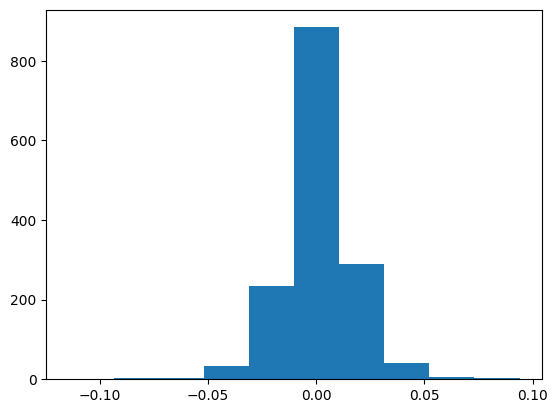

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['log_returns'])

In [97]:
from scipy.stats import shapiro
shapiro(df['log_returns'])

ShapiroResult(statistic=np.float64(0.9366154410425637), pvalue=np.float64(8.972677503397682e-25))

we can see that log-returns are normal at the level of p < 0.05, which means our decile approach should be okay

In [ ]:
df.to_csv('train.csv')